### Week7-2(1). Heat conduction in a rod

stability limit: 0.9527439024390245
(64, 41)
CPU time: 0.0s
0.0
0.9527439024390245
1.905487804878049
2.8582317073170733
3.810975609756098
4.763719512195123
5.716463414634147
6.669207317073171
7.621951219512196
8.57469512195122
9.527439024390246
10.48018292682927
11.432926829268293
12.385670731707318
13.338414634146343
14.291158536585368
15.243902439024392
16.196646341463417
17.14939024390244
18.102134146341466
19.05487804878049
20.007621951219516
20.96036585365854
21.913109756097565
22.865853658536587
23.81859756097561
24.771341463414636
25.72408536585366
26.676829268292686
27.62957317073171
28.582317073170735
29.53506097560976
30.487804878048784
31.44054878048781
32.393292682926834
33.34603658536586
34.29878048780488
35.25152439024391
36.20426829268293
37.15701219512196
38.10975609756098
39.06250000000001
40.01524390243903
40.96798780487806
41.92073170731708
42.873475609756106
43.82621951219513
44.778963414634156
45.73170731707317
46.6844512195122
47.63719512195122
48.58993902439025
4

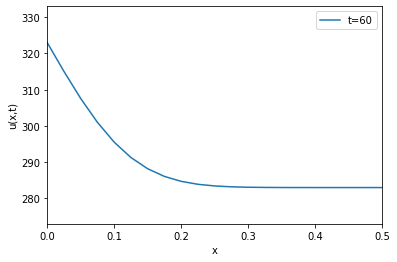

In [9]:
from numpy import linspace, zeros, linspace, asarray
import time

def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 g(x[i], t)
    i = N
    rhs[i] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + g(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 323

def dsdt(t):
    return 0

def g(x, t):
    return 0

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: asarray(f(u,t))
    u = zeros((N_t+1, len(U_0)))
    t= linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    print (np.shape(u))
    return u, t

L = 0.5                # Rod Length
beta = 8.2E-5       # K / rho * c K = heat conduction coefficient, rho = density, c = heat capacity
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283
dt = dx**2/(2*beta) # 0.9527439
#dt = 0.9999
print('stability limit:', dt)

t0 = time.perf_counter()
u, t = ode_FE(rhs, U_0, dt, T=1*60)
t1 = time.perf_counter()
print('CPU time: %.1fs' % (t1 - t0))

# Make movie
import os
os.system('rm tmp_*.png')
import matplotlib.pyplot as plt
plt.ion()
y = u[0,:]
lines = plt.plot(x, y)
plt.axis([x[0], x[-1], 273, s(0)+10])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
# Plot each of the first 100 frames, then increase speed by 10x
change_speed = 100
for i in range(0, u.shape[0]):
    print(t[i])
    plot = True if i <= change_speed else i % 10 == 0
    lines[0].set_ydata(u[i,:])
    if i > change_speed:
        plt.legend(['t=%.0f 10x' % t[i]])
    else:
        plt.legend(['t=%.0f' % t[i]])
    plt.draw()
    if plot:
        plt.savefig('tmp_%04d.png' % counter)
        counter += 1
    #time.sleep(0.2)